### 1.Installing and Importing required libraries

In [1]:
# Install libraries
%pip install numpy pandas matplotlib seaborn scikit-learn
%pip install xlrd

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xlrd

<ipython-input-2-0cc8c50cab28>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Collection

### 2.Downloading and loading data

In [3]:
data = pd.read_csv('Healthcare-Diabetes.csv')
print(data.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Data Wrangling

### 3. Data cleaning
Cleaning data to handle missing values, removing duplicates, and correcting any inconsistences

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns with missing values
data = data.dropna()  # Example: Drop rows with missing values


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### -no missing values found

## Exploratory Data Analysis and Visualisation

### 4.Data exploration
exploring data to understand its structures and characteristics

In [5]:
# Summary statistics
print(data.describe())

# Data types
print(data.info())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

### 5.Visualizing data
using visualizations to understand the distribution and relationships of data

#### use of histograms 
visualising the distribution of numerical features

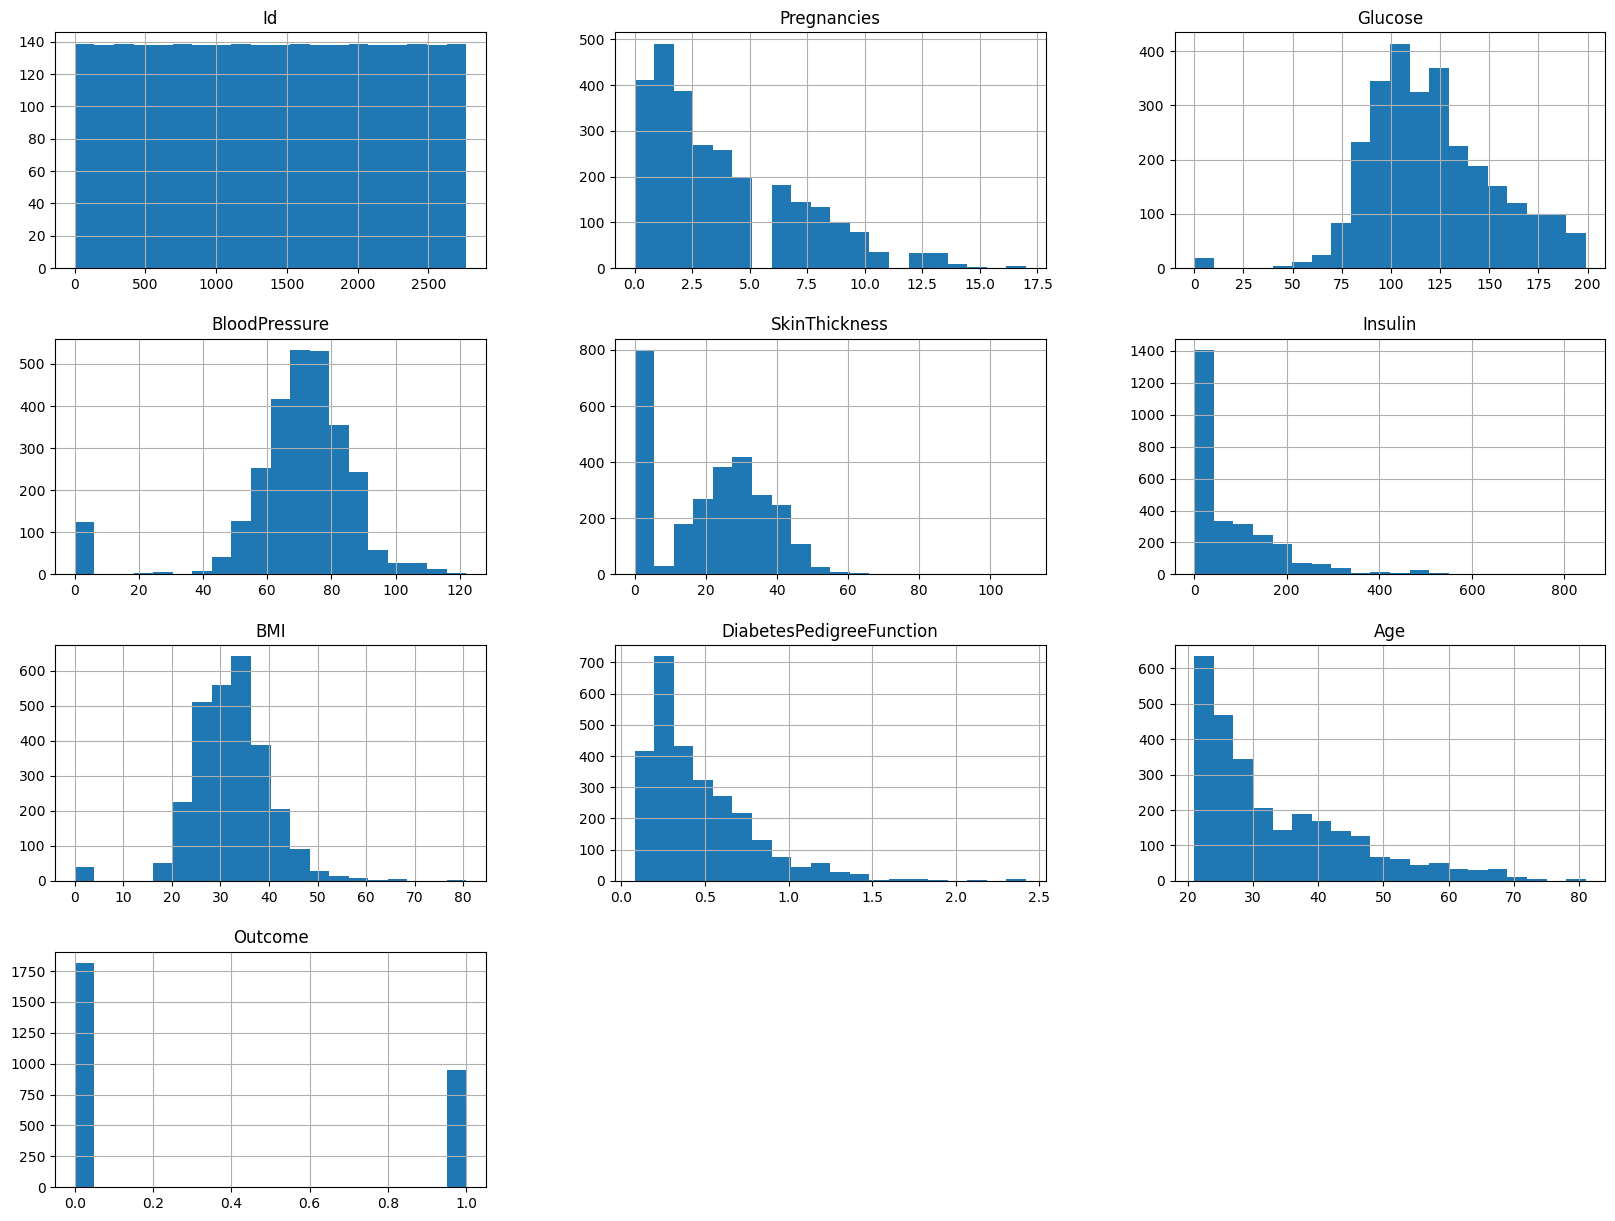

In [6]:
# Using Histogram of all features
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20, 15))
plt.show()

#### use of count plot

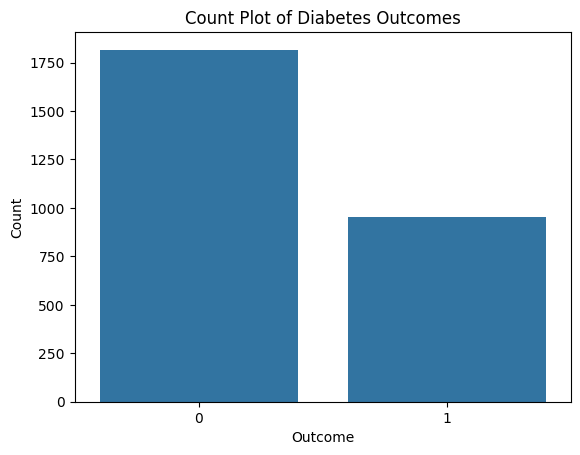

In [7]:
# Creating a count plot for the 'Outcome' variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Outcome', data= data)

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot of Diabetes Outcomes')

# Show the plot
plt.show()

##### Insights '0' plot(No Diabetes), '1'(Diabetes). There are more patients without diabetes

### Correlation heatmap
- visualising the relationships between different variables of the dataset.

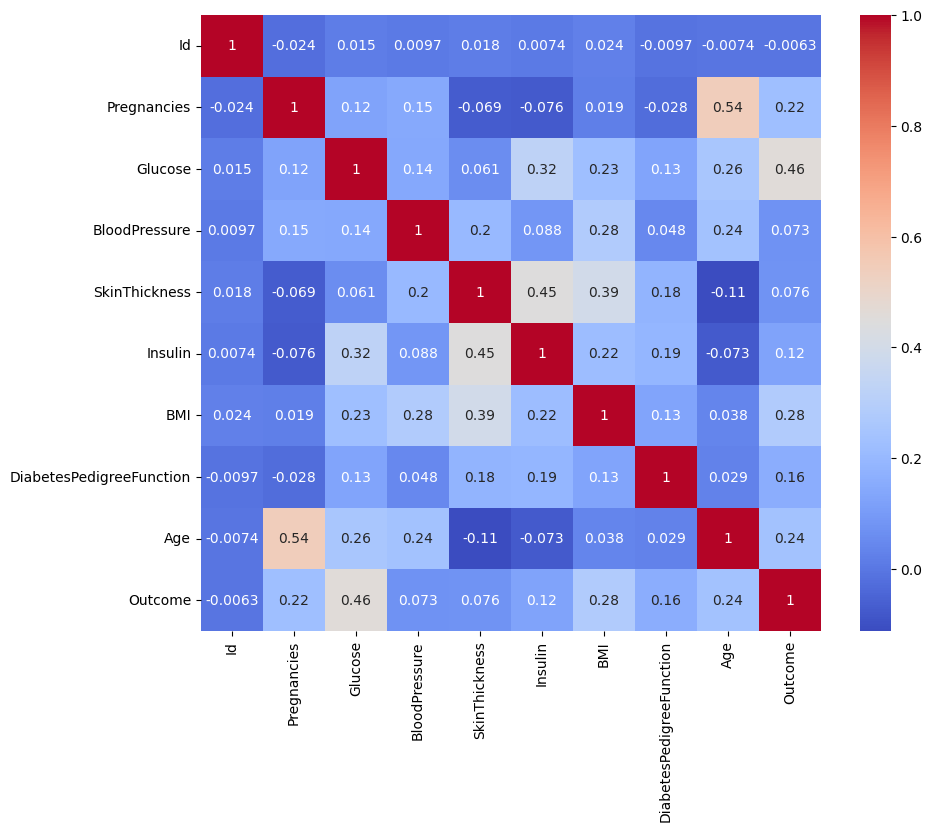

In [8]:
# Correlation heat map
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Correlation Coefficient:

The correlation coefficient ranges from -1 to 1.

-1: Perfect negative correlation (as one variable increases, the other decreases).

0: No correlation (the variables do not affect each other).

1: Perfect positive correlation (as one variable increases, the other also increases).

## Predictive analysis

### 7. Data Preprocessing
preparing data for analysis and modelling

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values
data = data.fillna(method='ffill')

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-9-37e8210fa0af>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


### 8.Model Building
Build and evaluate a machine learning model:

#### Use of k-NN model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[323  44]
 [ 50 137]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       367
           1       0.76      0.73      0.74       187

    accuracy                           0.83       554
   macro avg       0.81      0.81      0.81       554
weighted avg       0.83      0.83      0.83       554



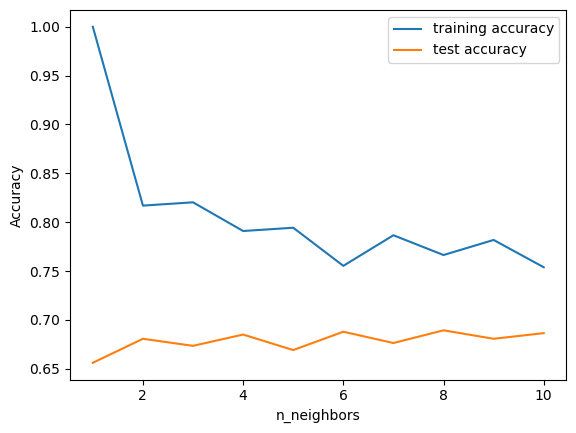

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.68


#### Use of Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[407  47]
 [103 135]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       454
           1       0.74      0.57      0.64       238

    accuracy                           0.78       692
   macro avg       0.77      0.73      0.74       692
weighted avg       0.78      0.78      0.78       692



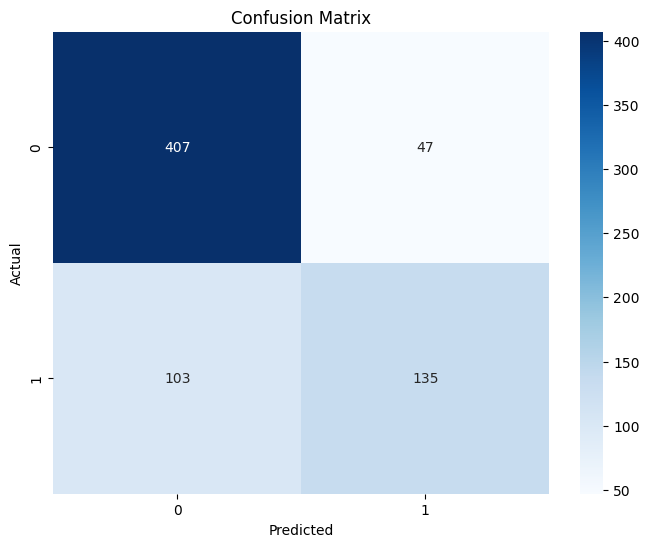

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression plot
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Use of Random Forest Classifier

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('Healthcare-Diabetes.csv')

# Handle missing values
data = data.fillna(method='ffill')

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a model (example: Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-18-a590a8259c2f>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


[[365   2]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



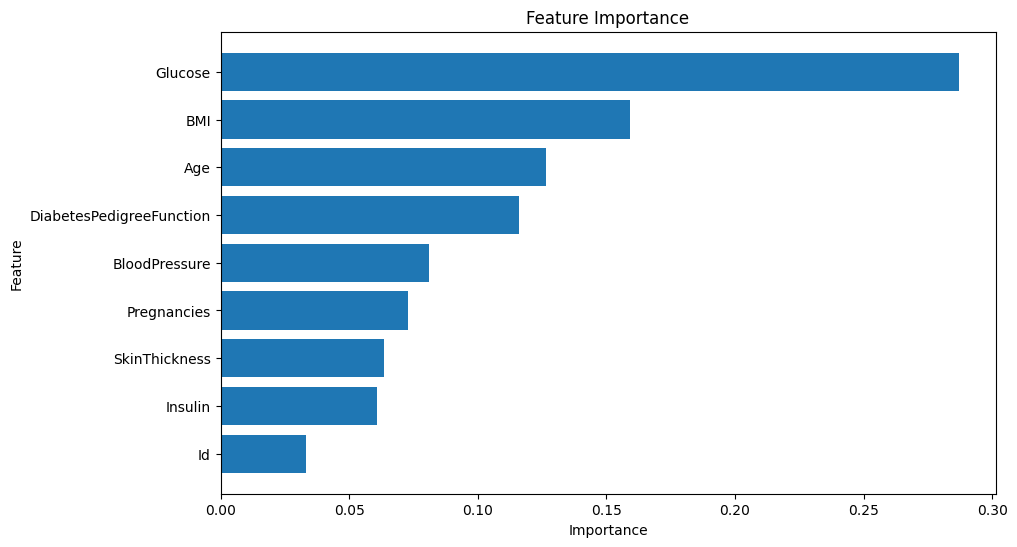

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# making a plot of random forest classifier
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Use of Decision Tree

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [21]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[359   8]
 [ 13 174]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       367
           1       0.96      0.93      0.94       187

    accuracy                           0.96       554
   macro avg       0.96      0.95      0.96       554
weighted avg       0.96      0.96      0.96       554



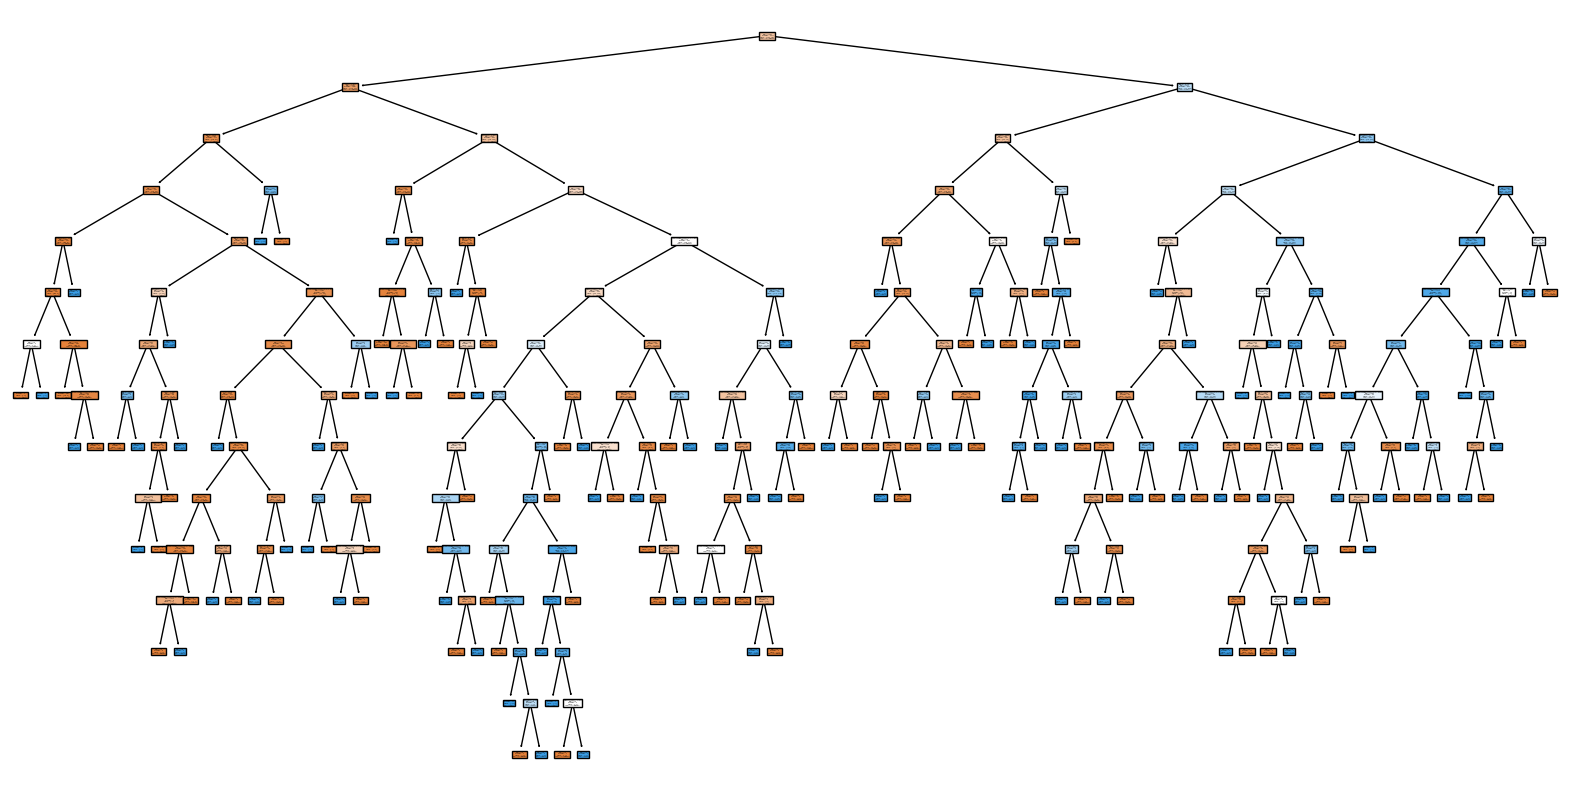

In [23]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

### Use of Vector Machine

In [24]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7689530685920578
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       367
           1       0.72      0.52      0.60       187

    accuracy                           0.77       554
   macro avg       0.75      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554



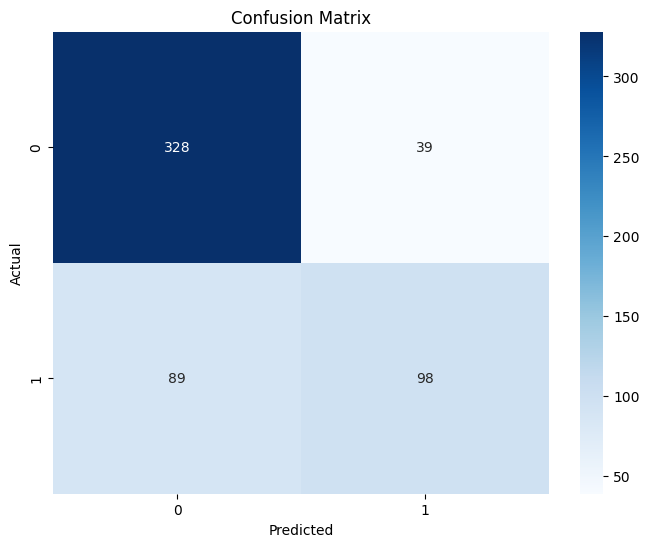

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()